# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Read the Data

In [2]:
comments = pd.read_csv(r'C:\Users\SCORPION\Documents\GITHUB\Text_Data_Analysis\Dataset\GBcomments.csv', error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

# Find Polarity 

#### Check Null Values in Data

In [4]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [5]:
comments.dropna(inplace=True)

In [6]:
polarity = [] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

#### Add New Column in Dataset

In [7]:
comments['polarity'] = polarity

In [8]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

# Exploratory Data Analysis (EDA) for the Positive Comments

### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

In [9]:
positive_comments = comments[comments['polarity'] == 1]

In [10]:
positive_comments.shape

(20400, 5)

In [11]:
positive_comments.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [12]:
from wordcloud import WordCloud,STOPWORDS

In [13]:
stopwords = set(STOPWORDS)

In [14]:
comments_all = ' '.join(positive_comments['comment_text'])

In [15]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords).generate(comments_all)

(-0.5, 999.5, 499.5, -0.5)

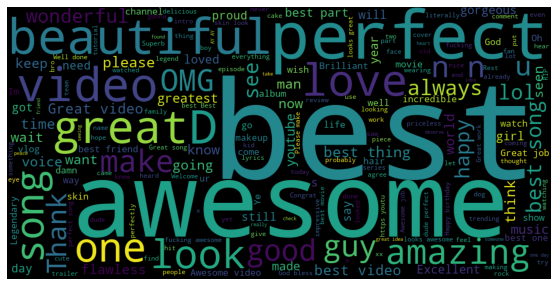

In [16]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Exploratory Data Analysis (EDA) for the Negative Comments

In [17]:
negative_comments = comments[comments['polarity'] == -1]

In [18]:
comments_all = ' '.join(negative_comments['comment_text'])

In [19]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords).generate(comments_all)

(-0.5, 999.5, 499.5, -0.5)

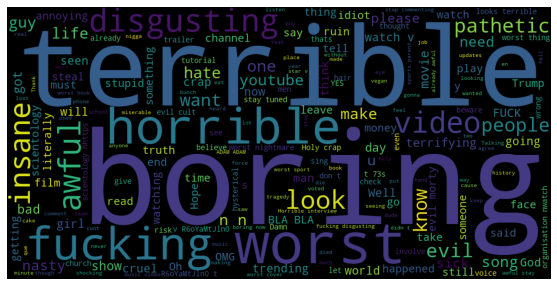

In [20]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Analyze Trending Tags & Views

In [21]:
videos = pd.read_csv(r'C:/Users/SCORPION/Documents/GITHUB/Text_Data_Analysis/Dataset/USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [22]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [23]:
tags = ' '.join(videos['tags'])

In [24]:
tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

### Remove anything apart from characters

In [25]:
import re

In [26]:
tags = re.sub('[^a-zA-Z]', ' ', tags)

In [27]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

### Remove extra spaces 

In [28]:
tags = re.sub(' +', ' ', tags)

In [29]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [30]:
tags_wordcloud = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

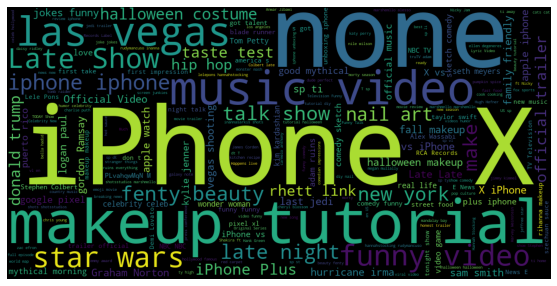

In [31]:
plt.figure(figsize=(15,5))
plt.imshow(tags_wordcloud)
plt.axis('off')

# Perform Analysis on Likes, Dislikes, Views & co-relation with each other

### Ploting Regresion Plot 

Text(0.5, 1.0, 'Plot For Views & Likes')

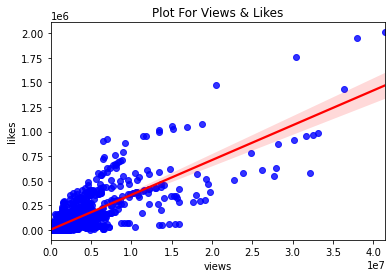

In [32]:
sns.regplot(data = videos, x = 'views', y = 'likes', scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})
plt.title('Plot For Views & Likes')

Text(0.5, 1.0, 'Plot For Views & Dis-Likes')

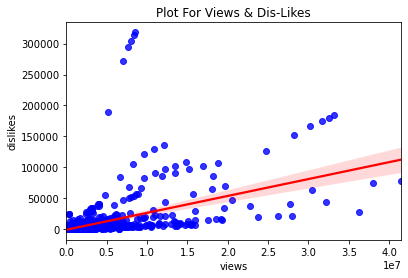

In [33]:
sns.regplot(data = videos, x = 'views', y = 'dislikes', scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})
plt.title('Plot For Views & Dis-Likes')

### Co-relation Matrix 

In [34]:
df_cor = videos[['views', 'likes', 'dislikes']]

In [35]:
df_cor.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

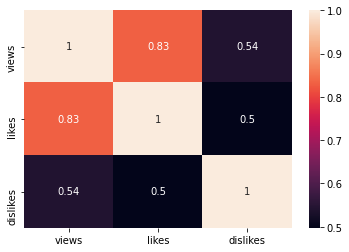

In [36]:
sns.heatmap(df_cor.corr(), annot = True)

# Perform Emojis Analysis

In [37]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [38]:
import emoji

In [42]:
str = ''
for i in comments['comment_text'].dropna():
    e_list = [c for c in i if c in emoji.UNICODE_EMOJI_ENGLISH]
    for ele in e_list:
        str = str + ele

In [43]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊😊😍😊❤❤❤❤😍

### Count emojis 

In [46]:
emoji_count = {}
for i in set(str):
    emoji_count[i] = str.count(i)
    
emoji_count

{'📣': 32,
 '🍅': 30,
 '🎤': 316,
 '🥞': 4,
 '🏪': 7,
 '🔹': 96,
 '📯': 23,
 '💘': 739,
 '😫': 782,
 '🍩': 76,
 '♿': 12,
 '🔜': 23,
 '👯': 40,
 '🚬': 35,
 '💆': 21,
 '👽': 95,
 '🤛': 23,
 '🤵': 4,
 '🚐': 6,
 '🤨': 3,
 '📿': 14,
 '⚽': 223,
 '💇': 26,
 '🐖': 32,
 '💜': 3616,
 '😆': 1423,
 '🏽': 1875,
 '📟': 11,
 '🚱': 7,
 '🙌': 2734,
 '🉑': 16,
 '🤮': 5,
 '💹': 4,
 '☯': 17,
 '💣': 234,
 '🗯': 13,
 '🌋': 42,
 '💾': 13,
 '🕌': 12,
 '🦆': 4,
 '👀': 596,
 '🦌': 6,
 '🍟': 49,
 '📈': 12,
 '📬': 12,
 '😧': 266,
 '📮': 9,
 '💗': 3071,
 '🀄': 9,
 '📒': 19,
 '🗽': 23,
 '🏩': 6,
 '👎': 712,
 '😐': 598,
 '🍒': 43,
 '⛲': 11,
 '🧛': 2,
 '✔': 214,
 '🧐': 3,
 '👚': 27,
 '🏜': 7,
 '🎁': 106,
 '🌖': 20,
 '❎': 5,
 '🌗': 15,
 '🍓': 240,
 '🚼': 17,
 '🤗': 1128,
 '🛒': 1,
 '😄': 1541,
 '💌': 26,
 '🏛': 15,
 '⚱': 23,
 '⚡': 196,
 '⚪': 56,
 '🌛': 51,
 '🥗': 7,
 '📴': 19,
 '🤱': 2,
 '🐵': 21,
 '⛰': 9,
 '🌅': 38,
 '💴': 45,
 '🐋': 19,
 '🍳': 38,
 '🥊': 8,
 '🔲': 5,
 '😒': 570,
 '😂': 43947,
 '👩': 222,
 '🐙': 43,
 '◽': 5,
 '🎿': 10,
 '🥝': 4,
 '😺': 107,
 '🐬': 216,
 '🔏': 9,
 '🔰': 19,
 '🚄': 6,
 '🎮

In [47]:
emoji_dict = {}
for key, value in sorted(emoji_count.items(), key = lambda items:items[1]):
    emoji_dict[key] = value

emoji_dict

{'🛒': 1,
 '🥜': 1,
 '🤾': 1,
 '🧣': 1,
 '🦓': 1,
 '🦏': 1,
 '🧤': 1,
 '🧠': 1,
 '🥨': 1,
 '🛷': 1,
 '🥟': 1,
 '🤽': 1,
 '🥡': 1,
 '🤟': 1,
 '🤺': 1,
 '🥚': 1,
 '🤹': 1,
 '🥌': 1,
 '🧛': 2,
 '🤱': 2,
 '🎌': 2,
 '🦖': 2,
 '🥅': 2,
 '🧢': 2,
 '🧘': 2,
 '🦔': 2,
 '🦕': 2,
 '🧒': 2,
 '🧝': 2,
 '🧡': 2,
 '🤨': 3,
 '🧐': 3,
 '🥄': 3,
 '🤫': 3,
 '🥖': 3,
 '🤯': 3,
 '🥞': 4,
 '🤵': 4,
 '💹': 4,
 '🦆': 4,
 '🥝': 4,
 '⏹': 4,
 '🛣': 4,
 '⚙': 4,
 '🖇': 4,
 '🗄': 4,
 '🤬': 4,
 '🛬': 4,
 '⏏': 4,
 '⏸': 4,
 '🗓': 4,
 '♟': 4,
 '⚧': 4,
 '🖍': 4,
 '🗂': 4,
 '⚗': 4,
 '🦐': 4,
 '☦': 4,
 '🛢': 4,
 '☸': 4,
 '♾': 4,
 '⏲': 4,
 '🏷': 4,
 '⏯': 4,
 '🏌': 4,
 '🧟': 4,
 '🥈': 4,
 '🦍': 4,
 '🤮': 5,
 '❎': 5,
 '🔲': 5,
 '◽': 5,
 'ℹ': 5,
 '🈵': 5,
 '⚾': 5,
 '🛤': 5,
 '🗳': 5,
 '🈁': 5,
 '🔳': 5,
 '➿': 5,
 '🛂': 5,
 '◻': 5,
 '🖨': 5,
 '↔': 5,
 '🔼': 5,
 '🕎': 5,
 '🗃': 5,
 '☂': 5,
 '🚁': 5,
 '🥛': 5,
 '🖊': 5,
 '🦒': 5,
 '🈳': 5,
 '↕': 5,
 '🆎': 5,
 '🛥': 5,
 '🔢': 5,
 '↩': 5,
 '⛸': 5,
 '🚻': 5,
 '🔠': 5,
 '🈯': 5,
 '⏺': 5,
 '⛱': 5,
 '🧖': 5,
 '🔁': 5,
 '⛏': 5,
 '🗞': 5,
 '🔃': 5,
 '🚠': 5,
 '🔡': 5,
 

In [67]:
emoji_keys = [*emoji_dict.keys()]
emoji_keys

['🛒',
 '🥜',
 '🤾',
 '🧣',
 '🦓',
 '🦏',
 '🧤',
 '🧠',
 '🥨',
 '🛷',
 '🥟',
 '🤽',
 '🥡',
 '🤟',
 '🤺',
 '🥚',
 '🤹',
 '🥌',
 '🧛',
 '🤱',
 '🎌',
 '🦖',
 '🥅',
 '🧢',
 '🧘',
 '🦔',
 '🦕',
 '🧒',
 '🧝',
 '🧡',
 '🤨',
 '🧐',
 '🥄',
 '🤫',
 '🥖',
 '🤯',
 '🥞',
 '🤵',
 '💹',
 '🦆',
 '🥝',
 '⏹',
 '🛣',
 '⚙',
 '🖇',
 '🗄',
 '🤬',
 '🛬',
 '⏏',
 '⏸',
 '🗓',
 '♟',
 '⚧',
 '🖍',
 '🗂',
 '⚗',
 '🦐',
 '☦',
 '🛢',
 '☸',
 '♾',
 '⏲',
 '🏷',
 '⏯',
 '🏌',
 '🧟',
 '🥈',
 '🦍',
 '🤮',
 '❎',
 '🔲',
 '◽',
 'ℹ',
 '🈵',
 '⚾',
 '🛤',
 '🗳',
 '🈁',
 '🔳',
 '➿',
 '🛂',
 '◻',
 '🖨',
 '↔',
 '🔼',
 '🕎',
 '🗃',
 '☂',
 '🚁',
 '🥛',
 '🖊',
 '🦒',
 '🈳',
 '↕',
 '🆎',
 '🛥',
 '🔢',
 '↩',
 '⛸',
 '🚻',
 '🔠',
 '🈯',
 '⏺',
 '⛱',
 '🧖',
 '🔁',
 '⛏',
 '🗞',
 '🔃',
 '🚠',
 '🔡',
 '🈴',
 '🏮',
 '🥉',
 '🔤',
 '🈹',
 '⛴',
 '🈲',
 '🆔',
 '🖼',
 '↖',
 '🔖',
 '🌫',
 '🚛',
 '⌨',
 '🗒',
 '🈂',
 '🗜',
 'Ⓜ',
 '🛋',
 '♦',
 '↪',
 '🚟',
 '🎐',
 '♠',
 '⚒',
 '🆖',
 '🧜',
 '🔚',
 '🚎',
 '🚉',
 '🔄',
 '✡',
 '🔂',
 '㊙',
 '🖲',
 '⛩',
 '🔣',
 '🕹',
 '🚐',
 '🦌',
 '🏩',
 '🚄',
 '⏭',
 '🌥',
 '🎑',
 '🚈',
 '🏸',
 '🌉',
 '⏮',
 '🚺',
 '🛁',
 '🛄',
 '🏓',
 '🏚',
 '⤵',
 '🚹'

In [68]:
emoji_cnt = [*emoji_dict.values()]
emoji_cnt

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [77]:
df = pd.DataFrame({'Emojis':emoji_keys[-50:], 'Counts':emoji_cnt[-50:]})
df

Emojis  Counts
0       💿     929
1       💋     963
2       🖕    1019
3       🤗    1128
4       😙    1139
5       😉    1153
6       🏾    1241
7       💪    1289
8       ✨    1298
9       😃    1327
10      😻    1363
11      💞    1393
12      😎    1412
13      😆    1423
14      ☺    1481
15      😄    1541
16      💓    1579
17      🤔    1734
18      😀    1788
19      💯    1796
20      🏽    1875
21      🙏    1886
22      😩    1924
23      😅    1977
24      😢    2074
25      💚    2138
26      💛    2169
27      😱    2316
28      🤣    2374
29      😁    2504
30      🙌    2734
31      🏼    2961
32      💙    2968
33      💗    3071
34      👌    3534
35      💜    3616
36      🏻    4412
37      💖    4809
38      😊    4946
39      👏    5357
40      😬    5489
41      👍    5817
42      😘    6334
43      💕    6531
44      ♥    7173
45      😭    9098
46      🔥   10249
47      😍   34856
48      ❤   36780
49      😂   43947

In [71]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [78]:
trace = go.Bar(x = df['Emojis'], y = df['Counts'])
iplot([trace])